# FAKE NEWS DETECTION SYSTEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Reading datasets

In [4]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [5]:
fake.shape

(23481, 4)

In [6]:
true.shape

(21417, 4)

# Data cleaning and preparation


In [7]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [8]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [9]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [10]:
# Check the data
data.head()

,title,text,subject,date,target
0,College Ad Welcomes New Students And Apologiz...,It doesn t matter how loudly Fox News protests...,News,"April 16, 2016",fake
1,"ANARCHY BY DESIGN: ‘Anti-Trump’ Flash Mobs, Ho...",Shawn Helton 21st Century WireIt s a novel sc...,US_News,"November 17, 2016",fake
2,OOPS: Trump’s ‘Voter Fraud’ Panel BACKFIRES O...,"Well, that has to be embarrassing.Ever since E...",News,"June 22, 2017",fake
3,Sam Bee’s Response To Trump’s Mega-Gaffe Is T...,"Samantha Bee, of Full Frontal with Samantha Be...",News,"May 6, 2016",fake
4,MUSLIM BROTHERHOOD AFFILIATE INVITED To Obama’...,So in an effort to reach out to Muslims living...,Government News,"Jan 12, 2016",fake


In [11]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,College Ad Welcomes New Students And Apologiz...,It doesn t matter how loudly Fox News protests...,News,fake
1,"ANARCHY BY DESIGN: ‘Anti-Trump’ Flash Mobs, Ho...",Shawn Helton 21st Century WireIt s a novel sc...,US_News,fake
2,OOPS: Trump’s ‘Voter Fraud’ Panel BACKFIRES O...,"Well, that has to be embarrassing.Ever since E...",News,fake
3,Sam Bee’s Response To Trump’s Mega-Gaffe Is T...,"Samantha Bee, of Full Frontal with Samantha Be...",News,fake
4,MUSLIM BROTHERHOOD AFFILIATE INVITED To Obama’...,So in an effort to reach out to Muslims living...,Government News,fake


In [12]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,It doesn t matter how loudly Fox News protests...,News,fake
1,Shawn Helton 21st Century WireIt s a novel sc...,US_News,fake
2,"Well, that has to be embarrassing.Ever since E...",News,fake
3,"Samantha Bee, of Full Frontal with Samantha Be...",News,fake
4,So in an effort to reach out to Muslims living...,Government News,fake


In [13]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,it doesn t matter how loudly fox news protests...,News,fake
1,shawn helton 21st century wireit s a novel sc...,US_News,fake
2,"well, that has to be embarrassing.ever since e...",News,fake
3,"samantha bee, of full frontal with samantha be...",News,fake
4,so in an effort to reach out to muslims living...,Government News,fake


In [14]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [15]:
# Check
data.head()

,text,subject,target
0,it doesn t matter how loudly fox news protests...,News,fake
1,shawn helton 21st century wireit s a novel sc...,US_News,fake
2,well that has to be embarrassingever since ele...,News,fake
3,samantha bee of full frontal with samantha bee...,News,fake
4,so in an effort to reach out to muslims living...,Government News,fake


In [16]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [17]:
data.head()


,text,subject,target
0,matter loudly fox news protests fact epidemic ...,News,fake
1,shawn helton 21st century wireit novel scene e...,US_News,fake
2,well embarrassingever since election day trump...,News,fake
3,samantha bee full frontal samantha bee provide...,News,fake
4,effort reach muslims living america need invit...,Government News,fake


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


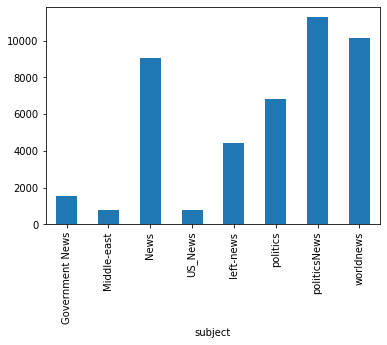

In [18]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


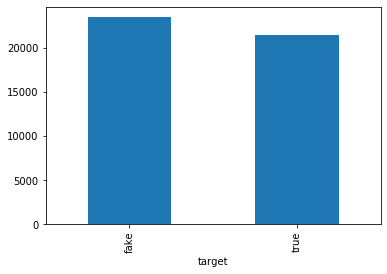

In [19]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [22]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

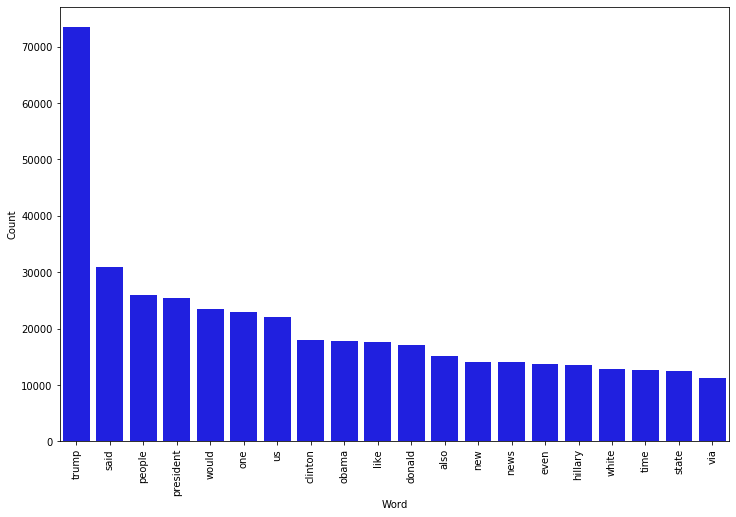

In [23]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)


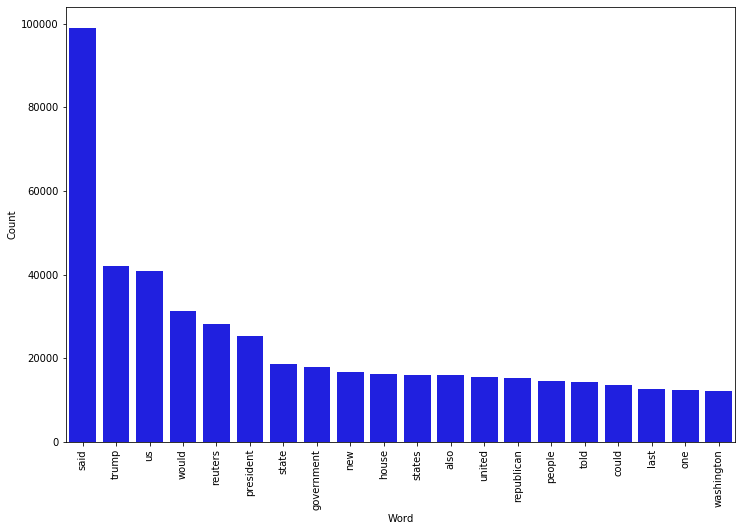

In [24]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

# Modeling 

In [25]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Peparing the data

In [26]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)


# Logistic regression

In [27]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.9%


Confusion matrix, without normalization


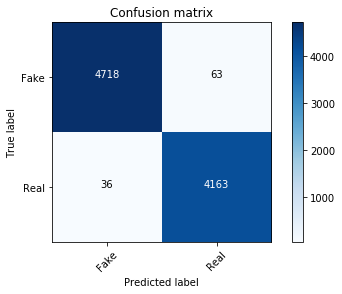

In [28]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.65%


Confusion matrix, without normalization


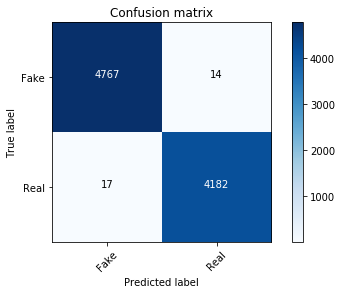

In [30]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 98.89%


Confusion matrix, without normalization


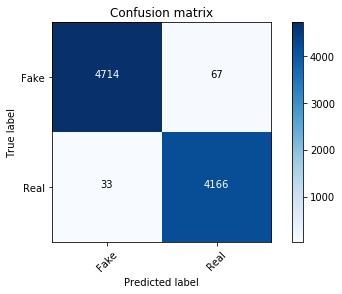

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
